<a href="https://colab.research.google.com/github/KarthikeyanBaskaran/FinancialAnalytics/blob/main/Financial_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import yfinance as yfs

In [2]:

symbol = 'META'

orginal = yfs.download(symbol, period="max", interval="1d")
orginal.to_csv("META.csv")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
orginal = pd.read_csv("META.csv")
orginal = orginal[2:]
orginal = orginal.reset_index()
orginal = orginal.drop(columns=["index"])
orginal = orginal.rename(columns={"Price":"Date"})
columns_to_convert = ["Close", "High", "Low", "Open"]
orginal[columns_to_convert] = orginal[columns_to_convert].astype(float)
orginal['Date'] = pd.to_datetime(orginal['Date'])
orginal['Volume'] = orginal['Volume'].astype(int)
orginal.head()

,Date,Close,High,Low,Open,Volume
0,2012-05-18,38.050671,44.788914,37.821750,41.852752,573576400
1,2012-05-21,33.870365,36.488029,32.845198,36.358638,168192700
2,2012-05-22,30.854582,33.432433,30.794864,32.457030,101786600
3,2012-05-23,31.849892,32.347546,31.212894,31.222848,73600000
4,2012-05-24,32.875057,33.054213,31.620969,32.795434,50237200


In [4]:
orginal.head(), orginal.tail()

(        Date      Close       High        Low       Open     Volume
 0 2012-05-18  38.050671  44.788914  37.821750  41.852752  573576400
 1 2012-05-21  33.870365  36.488029  32.845198  36.358638  168192700
 2 2012-05-22  30.854582  33.432433  30.794864  32.457030  101786600
 3 2012-05-23  31.849892  32.347546  31.212894  31.222848   73600000
 4 2012-05-24  32.875057  33.054213  31.620969  32.795434   50237200,
            Date       Close        High         Low        Open    Volume
 3243 2025-04-11  543.570007  547.400024  528.590027  535.510010  17642300
 3244 2025-04-14  531.479980  557.770020  528.280029  556.169983  14130900
 3245 2025-04-15  521.520020  537.940002  517.500000  532.109985  15558700
 3246 2025-04-16  502.309998  513.369995  495.630005  508.510010  18735100
 3247 2025-04-17  501.480011  507.299988  498.010010  505.250000  14593500)

In [5]:
df = orginal[(orginal['Date']>=datetime.datetime(2024,1,1))& (orginal['Date']<=datetime.datetime(2024,12,31))].reset_index().drop(columns=["index"])
test = orginal[orginal['Date']>datetime.datetime(2024,12,31)].reset_index().drop(columns=["index"])
df.tail(), test.head()

(          Date       Close        High         Low        Open   Volume
 247 2024-12-24  607.209778  607.449555  598.747336  602.184220  4726100
 248 2024-12-26  602.813660  605.761050  598.407607  604.941771  6081400
 249 2024-12-27  599.276855  601.315020  589.275743  598.877187  8084200
 250 2024-12-30  590.714417  596.409362  585.059475  588.226640  7025900
 251 2024-12-31  584.989563  593.442004  583.331004  591.743564  6019500,
         Date       Close        High         Low        Open    Volume
 0 2025-01-02  598.707336  604.372279  587.297505  589.195779  12682300
 1 2025-01-03  604.092529  608.958195  595.879805  604.222419  11436800
 2 2025-01-06  629.639832  630.429107  605.081663  611.286165  14560800
 3 2025-01-07  617.340759  631.538089  607.689312  631.138481  12071500
 4 2025-01-08  610.177124  615.892071  602.254180  612.854796  10085800)

# 5. Stock Signals

In [8]:
#Simple moving average

df["SMA10"] = df["Close"].rolling(window=10).mean()
df["SMA30"] = df["Close"].rolling(window=30).mean()
# Identify Buy and Sell signals
df["Buy_Signal_SMA"] = (df["SMA10"] > df["SMA30"]) & (df["SMA10"].shift(1) <= df["SMA30"].shift(1))
df["Sell_Signal_SMA"] = (df["SMA10"] < df["SMA30"]) & (df["SMA10"].shift(1) >= df["SMA30"].shift(1))

In [9]:
df.head()

,Date,Close,High,Low,Open,Volume,SMA10,SMA30,Buy_Signal_SMA,Sell_Signal_SMA
0,2024-01-02,344.665588,351.503357,338.415049,349.671992,19042200,NaN,NaN,False,False
1,2024-01-03,342.854126,346.317813,341.570169,343.361743,15451100,NaN,NaN,False,False
2,2024-01-04,345.491669,346.516836,341.789118,342.883964,12099900,NaN,NaN,False,False
3,2024-01-05,350.299042,351.841759,344.635731,345.362287,13920700,NaN,NaN,False,False
4,2024-01-08,356.977600,357.296106,350.398591,353.036184,13890200,NaN,NaN,False,False


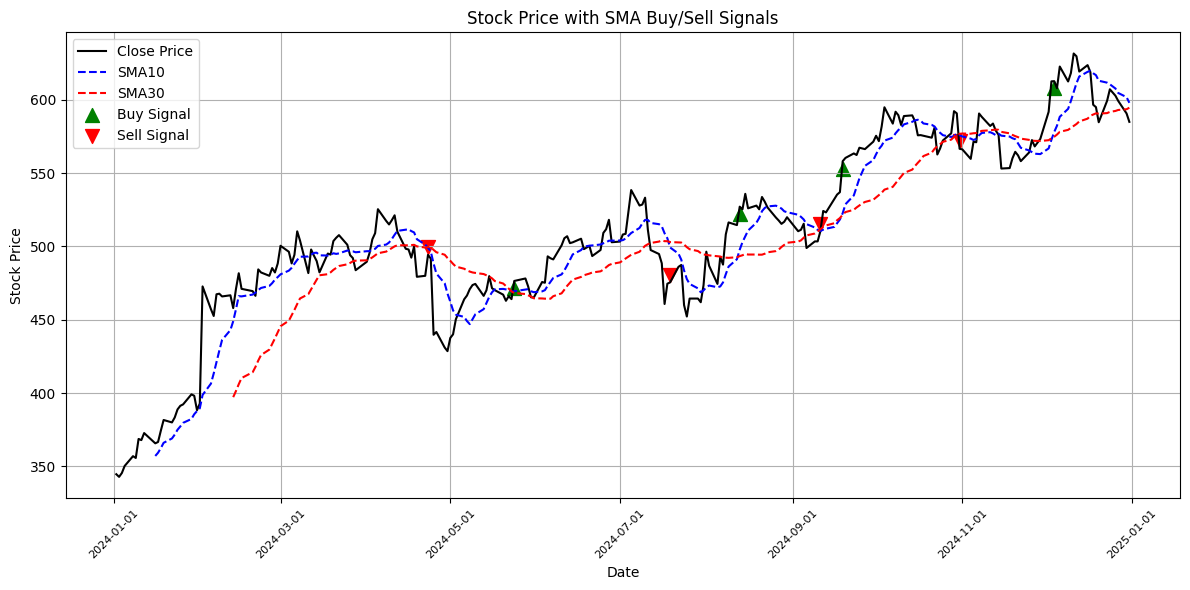

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define an offset for the arrows
offset = 5  # Adjust this value as needed

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], color='black', label='Close Price')
plt.plot(df['Date'], df['SMA10'], color='blue', linestyle='--', label='SMA10')
plt.plot(df['Date'], df['SMA30'], color='red', linestyle='--', label='SMA30')

# Plot Buy Signals with offset
buy_signals = df[df['Buy_Signal_SMA']]
plt.scatter(buy_signals['Date'], buy_signals['Close'] - offset, marker='^', s=100, color='green', label='Buy Signal')

# Plot Sell Signals with offset
sell_signals = df[df['Sell_Signal_SMA']]
plt.scatter(sell_signals['Date'], sell_signals['Close'] + offset, marker='v', s=100, color='red', label='Sell Signal')

# Format the x-axis to show dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_tick_params(rotation=45, labelsize=8)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price with SMA Buy/Sell Signals')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
#Exponential moving average
# Exponential moving average
df["EMA10"] = df["Close"].ewm(span=10, adjust=False, min_periods=10).mean()
df["EMA30"] = df["Close"].ewm(span=30, adjust=False, min_periods=50).mean()
df["Buy_Signal_EMA"] = (df["EMA10"] > df["EMA30"]) & (df["EMA10"].shift(1) <= df["EMA30"].shift(1))
df["Sell_Signal_EMA"] = (df["EMA10"] < df["EMA30"]) & (df["EMA10"].shift(1) >= df["EMA30"].shift(1))


In [12]:
df.head()

,Date,Close,High,Low,Open,Volume,SMA10,SMA30,Buy_Signal_SMA,Sell_Signal_SMA,EMA10,EMA30,Buy_Signal_EMA,Sell_Signal_EMA
0,2024-01-02,344.665588,351.503357,338.415049,349.671992,19042200,NaN,NaN,False,False,NaN,NaN,False,False
1,2024-01-03,342.854126,346.317813,341.570169,343.361743,15451100,NaN,NaN,False,False,NaN,NaN,False,False
2,2024-01-04,345.491669,346.516836,341.789118,342.883964,12099900,NaN,NaN,False,False,NaN,NaN,False,False
3,2024-01-05,350.299042,351.841759,344.635731,345.362287,13920700,NaN,NaN,False,False,NaN,NaN,False,False
4,2024-01-08,356.977600,357.296106,350.398591,353.036184,13890200,NaN,NaN,False,False,NaN,NaN,False,False


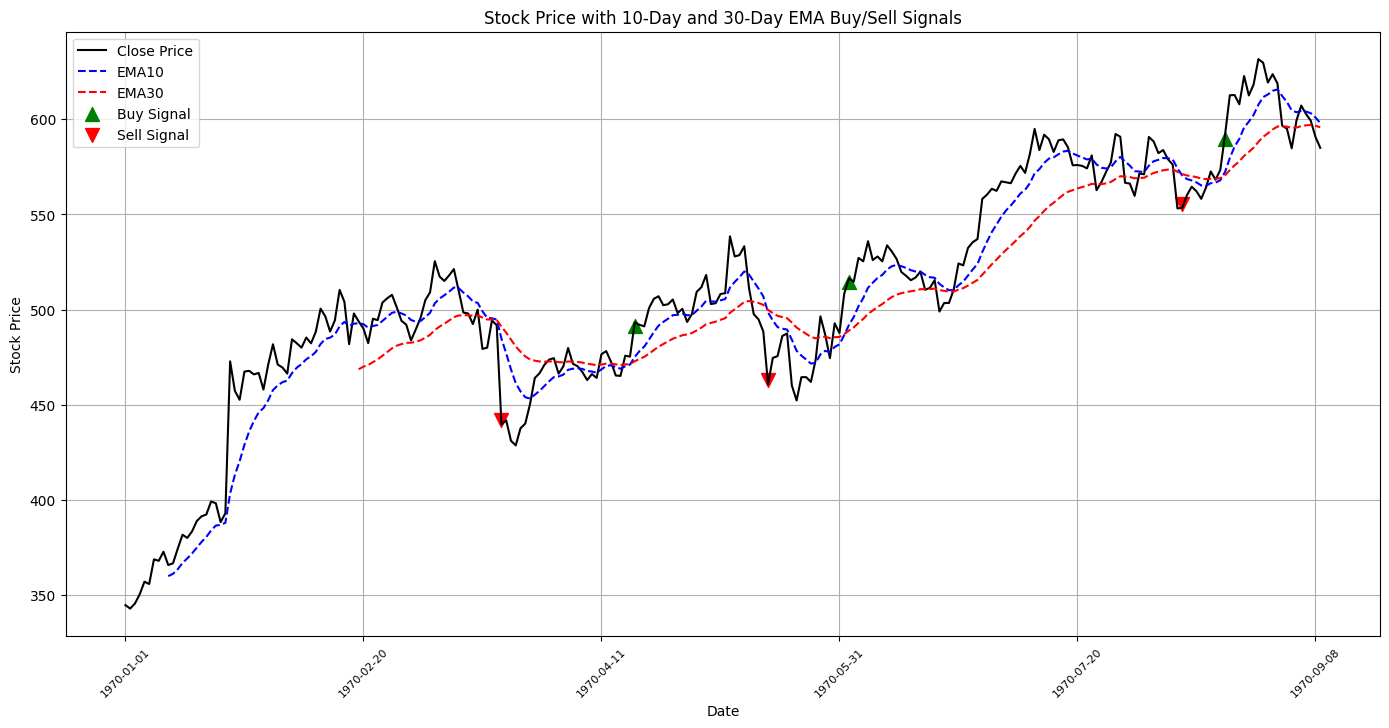

In [13]:
# Define an offset for the arrows
offset = 2  # Adjust this value as needed
arrow_size = 100  # Adjust this value for arrow size

# Plot
plt.figure(figsize=(14, 7))
plt.plot(df["Close"], label="Close Price", color="black")
plt.plot(df["EMA10"], label="EMA10", color="blue", linestyle="dashed")
plt.plot(df["EMA30"], label="EMA30", color="red", linestyle="dashed")

# Plot Buy Signals with offset and adjusted size
buy_signals = df[df["Buy_Signal_EMA"]]
plt.scatter(buy_signals.index, buy_signals["Close"] - offset, marker="^", s=arrow_size, color="green", label="Buy Signal", alpha=1)

# Plot Sell Signals with offset and adjusted size
sell_signals = df[df["Sell_Signal_EMA"]]
plt.scatter(sell_signals.index, sell_signals["Close"] + offset, marker="v", s=arrow_size, color="red", label="Sell Signal", alpha=1)

plt.title("Stock Price with 10-Day and 30-Day EMA Buy/Sell Signals")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Format the x-axis to display dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_tick_params(rotation=45, labelsize=8)

plt.show()

# 6. Forecasting

In [15]:
!pip install prophet optuna --quiet

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import optuna
import matplotlib.pyplot as plt

# Prophet
from prophet import Prophet

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

##


c:\Users\karth\anaconda3\envs\DAB200\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [17]:
df.tail()

,Date,Close,High,Low,Open,Volume,SMA10,SMA30,Buy_Signal_SMA,Sell_Signal_SMA,EMA10,EMA30,Buy_Signal_EMA,Sell_Signal_EMA
247,2024-12-24,607.209778,607.449555,598.747336,602.184220,4726100,610.615924,591.790442,False,False,604.335796,596.405811,False,False
248,2024-12-26,602.813660,605.761050,598.407607,604.941771,6081400,607.736475,592.423256,False,False,604.059044,596.819220,False,False
249,2024-12-27,599.276855,601.315020,589.275743,598.877187,8084200,604.692023,593.098572,False,False,603.189555,596.977777,False,False
250,2024-12-30,590.714417,596.409362,585.059475,588.226640,7025900,601.833557,593.582979,False,False,600.921348,596.573690,False,False
251,2024-12-31,584.989563,593.442004,583.331004,591.743564,6019500,597.964001,594.644586,False,False,598.024660,595.826327,False,False


In [19]:
train_df = df[["Date","Close", 'Volume']]
train_df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

C:\Users\karth\AppData\Local\Temp\ipykernel_26596\3825627958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)


In [20]:
train_df.tail()

,ds,y,Volume
247,2024-12-24,607.209778,4726100
248,2024-12-26,602.813660,6081400
249,2024-12-27,599.276855,8084200
250,2024-12-30,590.714417,7025900
251,2024-12-31,584.989563,6019500


In [21]:
actual = orginal[orginal['Date']>=datetime.datetime(2024,12,31)].reset_index().drop(columns=["index"])

In [22]:
test_df = actual[['Date', 'Close', 'Volume']]
test_df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

C:\Users\karth\AppData\Local\Temp\ipykernel_26596\582718894.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)


In [25]:
len(train_df), len(test_df)

(252, 74)

In [27]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from prophet.plot import add_changepoints_to_plot
import optuna
from prophet.diagnostics import cross_validation, performance_metrics
import datetime
import numpy as np

# Assuming you have train_df and test_df loaded as in your original notebook
# Make sure 'ds' column is in datetime format

# --- Define your objective function for Optuna (if you haven't run it already) ---
def objective(trial):
    # Hyperparameters to tune
    seasonality_mode = trial.suggest_categorical("seasonality_mode", ["additive", "multiplicative"])
    changepoint_prior_scale = trial.suggest_float("changepoint_prior_scale", 0.01, 20.0, log=True)
    seasonality_prior_scale = trial.suggest_float("seasonality_prior_scale", 0.01, 20.0, log=True)
    holidays_prior_scale = trial.suggest_float("holidays_prior_scale", 0.01, 10.0, log=True)

    # Build the Prophet model
    model = Prophet(
        seasonality_mode=seasonality_mode,
        changepoint_prior_scale=changepoint_prior_scale,
        seasonality_prior_scale=seasonality_prior_scale,
        holidays_prior_scale=holidays_prior_scale,
    )

    # Add extra regressors
    model.add_regressor('Volume')

    # Fit on the train_df
    model.fit(train_df)

    df_cv = cross_validation(
        model=model,
        initial='180 days',   # e.g., use ~2 years of data before first cutoff
        horizon='30 days',     # e.g., 3-month forecast horizon
        period='90 days'      # new fold every 3 months
    )

    # Predict on val_sub
    df_metrics = performance_metrics(df_cv, rolling_window=1)
    rmse_cv = df_metrics['rmse'].values[0]   # We'll optimize for RMSE

    return rmse_cv

# --- Run Optuna study (if you haven't already) ---
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=40)  # Increase n_trials for more thorough search
best_trial = study.best_trial
print("Best trial RMSE (Val):", best_trial.value)
print("Best trial params:", best_trial.params)

best_params = study.best_params

# --- Modify Prophet to only predict on business days ---

def business_day_filter(dates):
    """Filters out non-business days (weekends) from a list of dates."""
    return [date for date in dates if date.weekday() < 5]

final_model = Prophet(
    seasonality_mode=best_params["seasonality_mode"],
    changepoint_prior_scale=best_params["changepoint_prior_scale"],
    seasonality_prior_scale=best_params["seasonality_prior_scale"],
    holidays_prior_scale=best_params["holidays_prior_scale"]
)

lags_to_include = [1, 5, 10, 20] # Example lags
train_df_lagged = create_lagged_features(train_df.copy(), lags_to_include)
test_df_lagged = create_lagged_features(test_df.copy(), lags_to_include)

# Add the lagged features as regressors to the Prophet model
for lag in lags_to_include:
    final_model.add_regressor(f'Close_Lag{lag}')
final_model.add_regressor('Volume') # Ensure 'Volume' is added

final_model.fit(train_df_lagged)

# Create future dataframe with all dates in the test period
future_all = final_model.make_future_dataframe(periods=len(test_df), freq='D')

# Filter for business days
future_business_days = future_all[future_all['ds'].dt.weekday < 5]

# Merge with the 'Volume' data for the test period
future_test_with_volume = pd.merge(future_business_days, test_df[['ds', 'Volume']], on='ds', how='inner')

# Ensure the order of columns matches what the model was trained on
future_test_lagged = future_test_with_volume[['ds', 'Volume']].copy()
for lag in lags_to_include:
    future_test_lagged[f'Close_Lag{lag}'] = np.nan # Initialize with NaN

# Manually create lagged features for the future (this is a bit tricky as we don't have actual future 'y' values)
# A more accurate approach might involve iteratively predicting and using the predicted values for subsequent lags,
# but for a direct prediction on the test set, we'll use the lagged values from the end of the training data.

last_train_data = train_df_lagged.tail(lags_to_include[-1])
last_train_data_y = last_train_data[['y']].values[::-1]
num_rows_to_fill = len(last_train_data_y)
lag_columns = [f'Close_Lag{lag}' for lag in lags_to_include]

for i in range(num_rows_to_fill):
    for j, lag in enumerate(lags_to_include):
        if i < len(future_test_lagged):
            future_test_lagged.loc[i, f'Close_Lag{lag}'] = last_train_data_y[i, 0]

for i in range(lags_to_include[-1], len(future_test_lagged)):
    for lag_val in lags_to_include:
        if i - lag_val >= 0 and i - lag_val < len(test_df_lagged):
            future_test_lagged.loc[i, f'Close_Lag{lag_val}'] = test_df_lagged.iloc[i - lag_val]['y']
        else:
            future_test_lagged.loc[i, f'Close_Lag{lag_val}'] = np.nan # Handle cases where lag exceeds available data
future_test_lagged.dropna(inplace=True)



[I 2025-04-18 15:41:43,460] A new study created in memory with name: no-name-62525167-d691-4d5a-911e-5ade4782ba87
15:41:43 - cmdstanpy - INFO - Chain [1] start processing
15:41:43 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/2 [00:00<?, ?it/s]15:41:43 - cmdstanpy - INFO - Chain [1] start processing
15:41:44 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 1/2 [00:00<00:00,  2.82it/s]15:41:44 - cmdstanpy - INFO - Chain [1] start processing
15:41:44 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 2/2 [00:00<00:00,  2.79it/s]
[I 2025-04-18 15:41:44,609] Trial 0 finished with value: 27.3850534772871 and parameters: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.03174184283796425, 'seasonality_prior_scale': 0.03065368079963815, 'holidays_prior_scale': 0.8105876612012427}. Best is trial 0 with value: 27.3850534772871.
15:41:44 - cmdstanpy - INFO - Chain [1] start processing
15:41:45 - cmdstanpy - INFO - Chain [1] done p

Best trial RMSE (Val): 25.508505868218496
Best trial params: {'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.04994954218313806, 'seasonality_prior_scale': 0.06446866252934814, 'holidays_prior_scale': 0.6839664628060751}


NameError: name 'create_lagged_features' is not defined

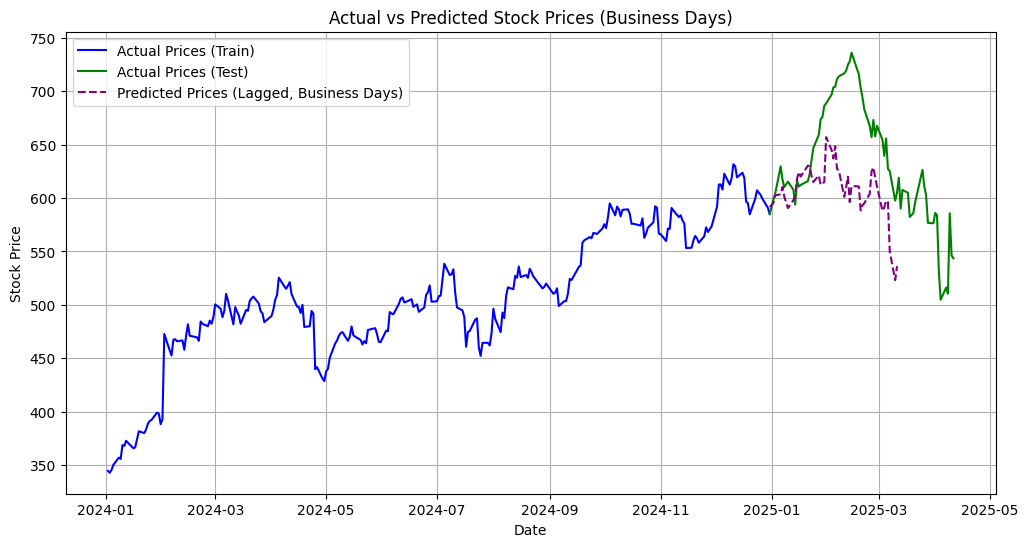

In [46]:

forecast_test_lagged = final_model.predict(future_test_lagged)

# Plot the results
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(df['Date'], df['Close'], label="Actual Prices (Train)", color='blue')
plt.plot(actual['Date'], actual['Close'], label="Actual Prices (Test)", color='green')
plt.plot(future_test_lagged['ds'], forecast_test_lagged['yhat'], label="Predicted Prices (Lagged, Business Days)", color='purple', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Actual vs Predicted Stock Prices (Business Days)")
plt.legend()
plt.show()